In [1]:
import pandas as pd
import XCCourseHelper as XC
import os
import matplotlib.pyplot as plt
import GradeAdjustedPace

In [2]:
directory = "Courses/ATB"
dfs = []
CourseInformationList = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)
    if filename.endswith(".gpx"):
        FilePath = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(FilePath):
            CourseName = filename[0:-4]
            CourseInformation, df = XC.GetCourseInformation(CourseName, FilePath)
            CourseInformationList.append(CourseInformation)
            dfs.append(df)

CourseInformationDF = pd.concat(CourseInformationList, ignore_index=True)

strava__2346911231.gpx


In [3]:
course = 'ATB'
gpx_file='./Courses/ATB/strava__2346911231.gpx'
df, turn_st_dev, tot_deg_turned, HairpinCount, perim, area = XC.MakeInitialDataframe(
        course, gpx_file
    )

In [4]:
df.head()

,time,Lat,Lon,Elevation,Elevation SavGol,Elevation SavGol Difference,Elevation Difference,Time Difference,DistanceChangeInKM,Angle Difference
Distance,,,,,,,,,,
0.187886,1970-01-01 00:00:00+00:00,43.260037,-79.872996,97.9,97.903306,NaN,0.0,0.0,NaN,NaN
0.190023,1970-01-01 00:00:01+00:00,43.260031,-79.872971,97.9,97.889292,-0.014013,0.0,1.0,0.002137,NaN
0.192083,1970-01-01 00:00:02+00:00,43.260025,-79.872947,97.9,97.874238,-0.015054,0.0,1.0,0.002060,NaN
0.196976,1970-01-01 00:00:03+00:00,43.260007,-79.872892,97.8,97.858154,-0.016084,0.1,1.0,0.004893,NaN
0.204683,1970-01-01 00:00:04+00:00,43.259981,-79.872804,97.8,97.841052,-0.017102,0.0,1.0,0.007707,NaN


In [5]:
import copy
import numpy as np
from scipy.signal import savgol_filter
pace_hist = ((df["Time Difference"] / 60) / df["DistanceChangeInKM"]).values
df["PaceInMinPerKM"] = pace_hist

df['PaceInMinPerKM'] = df['PaceInMinPerKM'].apply(lambda x: x if x < 4.2 else 4.2)
df["PaceInMinPerKM"] = savgol_filter(df["PaceInMinPerKM"], 101, 3)

3.17034728021498


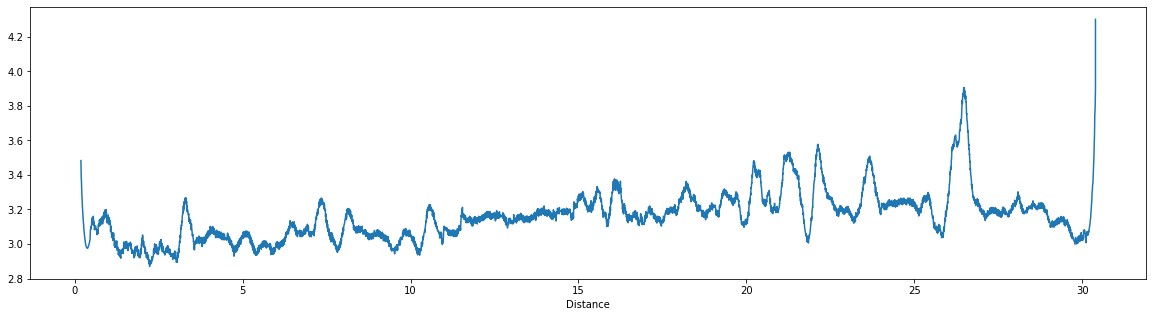

In [6]:
df['PaceInMinPerKM'].plot(figsize=(20,5))
print(df['PaceInMinPerKM'].mean())

In [7]:
CourseInformationDF

,Course,Turn Stdev,Total Degrees Turned,Perimeters/Total Distance,Course Area (m^2),Number of Hairpin Turns,Hill Stdev,Tallest Hill (m),Length of tallest hill (m),Number of Hills,Total Elevation Gain (m),Total Elevation Gain Unfiltered (m),Start Lat,Start Lon,Course Ave. GAP - Strava,Course Ave. GAP - Minetti
0,strava__2346911231,17.042252,47226.9515,30386.074594,3.645288e+07,36,10.741015,35.1,2.65112,13,251.6,251.6,43.260037,-79.872996,1.012278,1.016397


In [8]:
df.head()

,time,Lat,Lon,Elevation,Elevation SavGol,Elevation SavGol Difference,Elevation Difference,Time Difference,DistanceChangeInKM,Angle Difference,PaceInMinPerKM
Distance,,,,,,,,,,,
0.187886,1970-01-01 00:00:00+00:00,43.260037,-79.872996,97.9,97.903306,NaN,0.0,0.0,NaN,NaN,3.483506
0.190023,1970-01-01 00:00:01+00:00,43.260031,-79.872971,97.9,97.889292,-0.014013,0.0,1.0,0.002137,NaN,3.450015
0.192083,1970-01-01 00:00:02+00:00,43.260025,-79.872947,97.9,97.874238,-0.015054,0.0,1.0,0.002060,NaN,3.417905
0.196976,1970-01-01 00:00:03+00:00,43.260007,-79.872892,97.8,97.858154,-0.016084,0.1,1.0,0.004893,NaN,3.387152
0.204683,1970-01-01 00:00:04+00:00,43.259981,-79.872804,97.8,97.841052,-0.017102,0.0,1.0,0.007707,NaN,3.357733


<AxesSubplot:xlabel='Distance'>

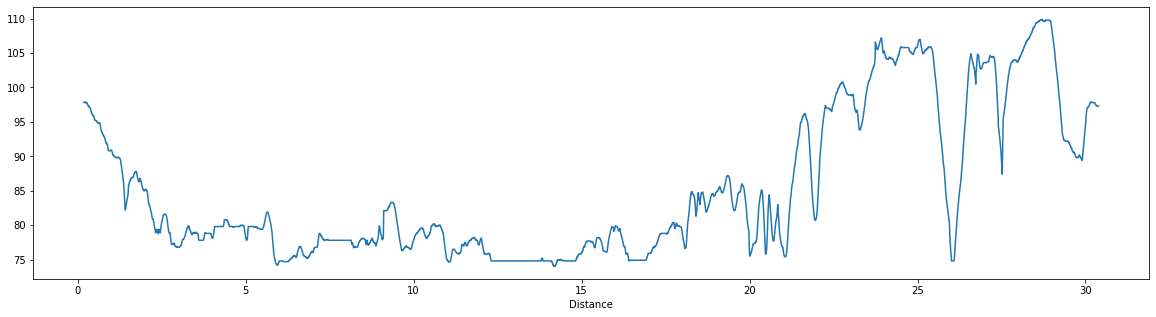

In [9]:
df['Elevation'].plot(figsize=(20,5))

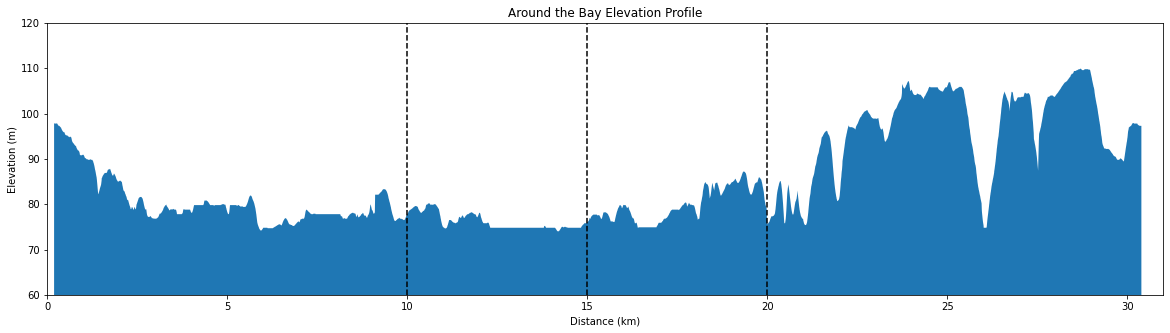

In [10]:
def PlotElevationProfile(df):
    fig = plt.figure(figsize=(20,5))
    plt.fill_between(x=df.index, y1=0, y2=df['Elevation'])
    ymin = 60
    ymax = 120
    plt.ylim(ymin,ymax)
    plt.xlim(0,31)
    plt.xlabel('Distance (km)')
    plt.ylabel('Elevation (m)')
    plt.vlines(x=[10,15,20], ymin=ymin, ymax=ymax, colors='k', linestyles='dashed')
    plt.title('Around the Bay Elevation Profile')
    plt.show()

PlotElevationProfile(df)


### Adding Gradient

In [12]:
GAP = GradeAdjustedPace.GAP(df)
GAP.getMinettiCourseGAP()
GAP.getStravaCourseGAP()
df = GAP.gradientCalculation()

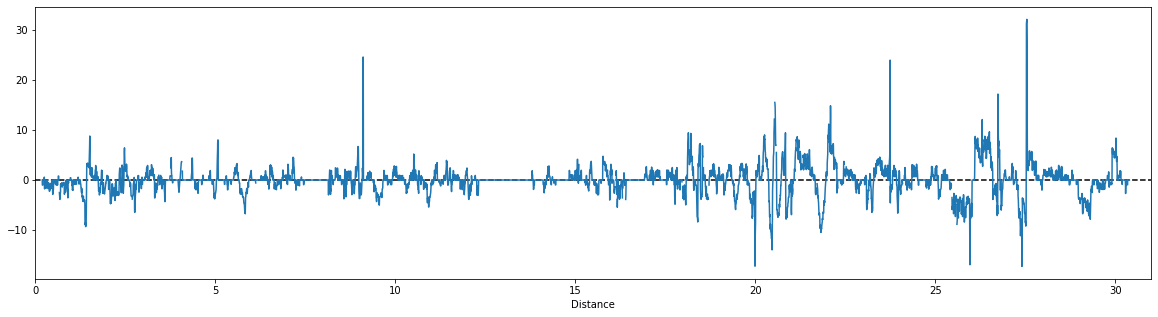

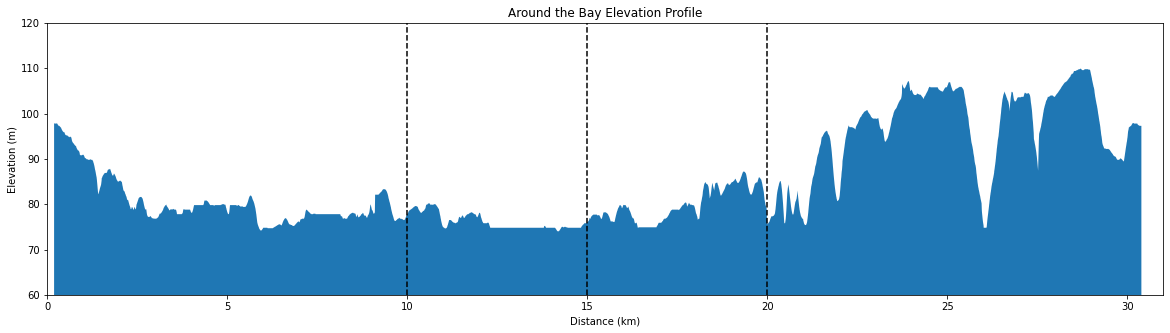

In [13]:
df['Gradient'].plot(figsize=(20,5))
plt.xlim(0,31)
plt.hlines(0,0,31, colors='k', linestyles='dashed')

PlotElevationProfile(df)
# df

In [18]:
df.to_csv('./Course DataFrames/ATB30km.csv')
CourseInformationDF.to_csv('./Course DataFrames/ATB30kmInfo.csv')

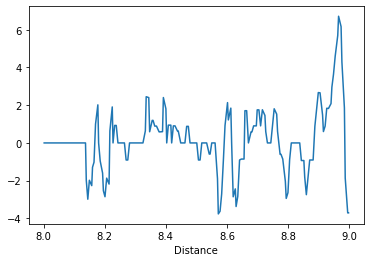

<AxesSubplot:xlabel='Distance'>

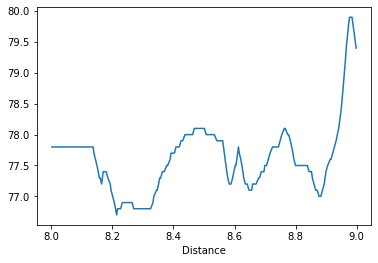

In [15]:
df['Gradient'].loc[(df.index<9) & (df.index>8)].plot()
plt.show()
df['Elevation'].loc[(df.index<9) & (df.index>8)].plot()